In [35]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris    
#导入决策树模型DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
iris = load_iris()   #加载数据
X = iris.data[:,2:] # 取鸢尾花的两个特征petal length and width
y = iris.target     
#创建决策树模型
tree_clf = DecisionTreeClassifier(max_depth=2)
#输入训练数据，训练模型
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

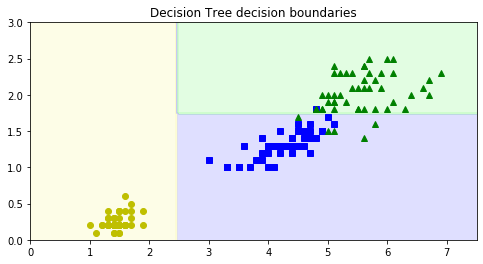

In [38]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False):
    #显示决策树分类后的边界
    # 生成x1,x2的数据
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    # 把x1,x2数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # 计算x1,x2坐标对应的高度值y_pred
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    # 填充等高线
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    #输出样本点    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.axis(axes)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.title('Decision Tree decision boundaries')
plt.show()

In [40]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [41]:
tree_clf.predict([[5,1.5]])

array([1])

Text(0.5, 1.0, 'min_samples_leaf=4')

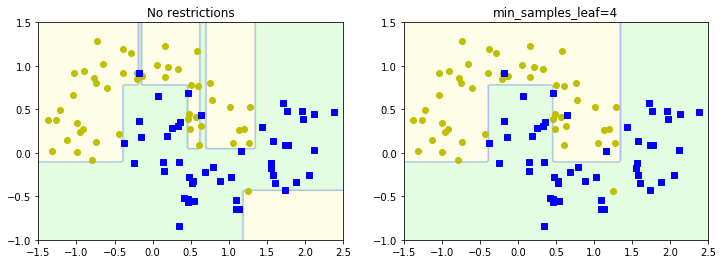

In [42]:
from sklearn.datasets import make_moons
#生成数据集
X,y = make_moons(n_samples=100,noise=0.25,random_state=53)
#分别建立两个决策树，一个不加限制
#一个要求叶子节点必须具有的最小样本数为4，否则不再继续分支
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
tree_clf1.fit(X,y)
tree_clf2.fit(X,y)
#显示第一个决策树
plt.figure(figsize=(12,4))
plt.subplot(121)
plot_decision_boundary(tree_clf1,X,y,axes=[-1.5,2.5,-1,1.5],iris=False)
plt.title('No restrictions')
#显示第二个决策树
plt.subplot(122)
plot_decision_boundary(tree_clf2,X,y,axes=[-1.5,2.5,-1,1.5],iris=False)
plt.title('min_samples_leaf=4')